In [1]:
import pandas as pd 
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
import sys
from pathlib import Path

proj_path = Path('/cluster') / 'work' / 'stefandt' / 'pers-pred'
resolved = proj_path.resolve()
if resolved not in sys.path: sys.path.append(str(resolved))

from src.utils import get_commons

paths, constants, config, logger, device = get_commons()

2024-06-20 09:01:44,180 - ArgumentLogger - INFO - Arguments:
2024-06-20 09:01:44,182 - ArgumentLogger - INFO - seed: 42
2024-06-20 09:01:44,182 - ArgumentLogger - INFO - dataframe: {'generate': False, 'mbti_frac': 0.1, 'bigfive_c_frac': 1.0, 'bigfive_s_frac': 1.0}
2024-06-20 09:01:44,183 - ArgumentLogger - INFO - eda: {'generate': False}
2024-06-20 09:01:44,184 - ArgumentLogger - INFO - reduce: {'generate': False, 'use_full': False}
2024-06-20 09:01:44,184 - ArgumentLogger - INFO - preprocessing: {'generate_features': False, 'generate_partially_cleaned': False, 'generate_cleaned': False, 'generate_embeddings': False, 'generate_aggregated': True, 'generate_glove': False, 'generate_filled': True}
2024-06-20 09:01:44,185 - ArgumentLogger - INFO - imputation: {'num_of_clusters': 4, 'n_components': 2}
2024-06-20 09:01:44,186 - ArgumentLogger - INFO - split: {'train': 0.8, 'test': 0.1}
2024-06-20 09:01:44,186 - ArgumentLogger - INFO - dataloaders: {'train': {'num_workers': 1, 'pin_memory': F

device: cpu


In [2]:
df = pd.read_csv(paths['new']['imputed-all'], header=[0, 1], index_col=0)

In [3]:
for target in ('IMP_TARGET', 'ORG_TARGET'):
    print(target)
    new_df = df.dropna(subset=[(target, 'cEXT'), (target, 'mbtiEXT')], axis=0)
    print(new_df.loc[new_df[(target, 'cEXT')] != new_df[(target, 'mbtiEXT')]].shape)

IMP_TARGET
(2137, 40)
ORG_TARGET
(0, 40)


In [4]:
df.columns

MultiIndex([(     'STATS',              'chars'),
            (     'STATS',         'uppercased'),
            (     'STATS',             'emojis'),
            (     'STATS',              'posts'),
            (     'STATS',         'duplicates'),
            (     'STATS',      'word_nonwords'),
            (     'STATS',      'nonword_words'),
            (     'STATS',     'nonword_spaces'),
            (     'STATS', 'space_punctuations'),
            (     'STATS',           'hashtags'),
            (     'STATS',               'urls'),
            (     'STATS',           'mentions'),
            ('ORG_TARGET',            'mbtiEXT'),
            ('ORG_TARGET',            'mbtiSEN'),
            ('ORG_TARGET',            'mbtiTHI'),
            ('ORG_TARGET',            'mbtiJUD'),
            ('ORG_TARGET',               'cEXT'),
            ('ORG_TARGET',               'cNEU'),
            ('ORG_TARGET',               'cAGR'),
            ('ORG_TARGET',               'cCON'),


<Axes: >

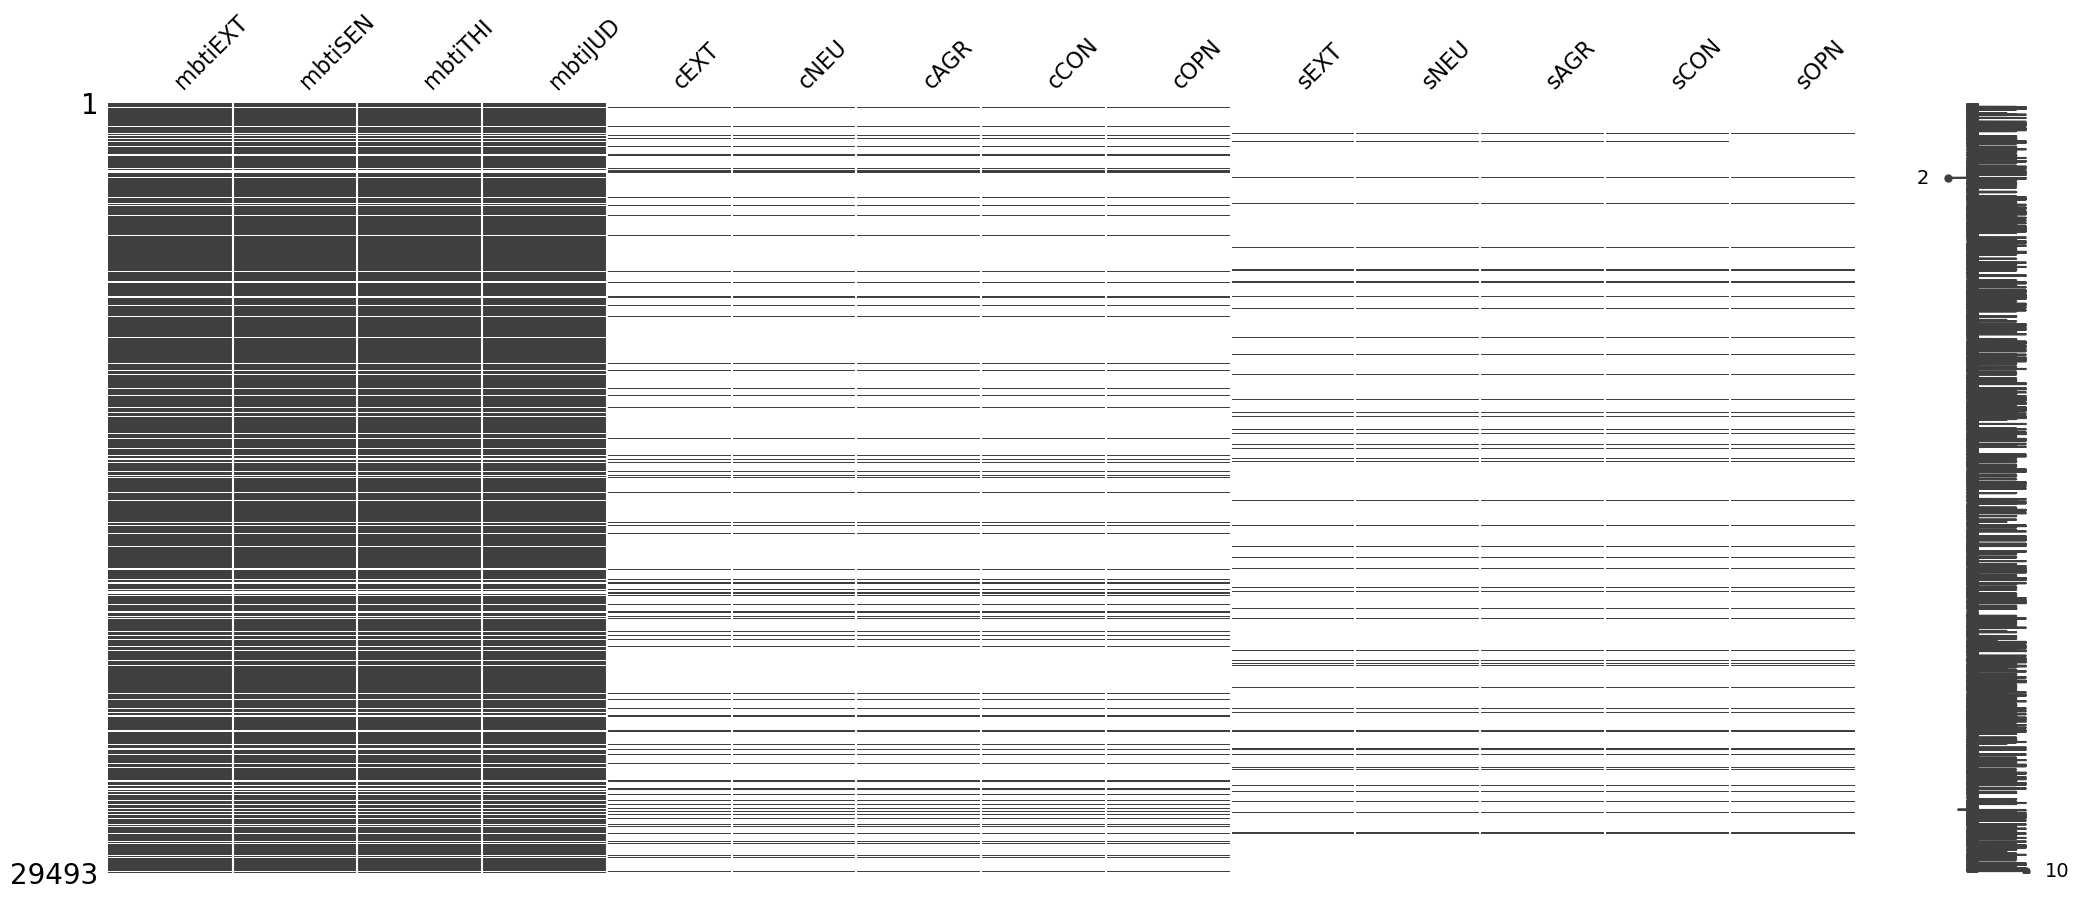

In [5]:
msno.matrix(df['ORG_TARGET'].dropna(how='all'))

In [6]:
select = [('ORG_TARGET', col) for col in ['cEXT', 'sEXT', 'mbtiEXT']]
corr = df[select].rename(columns={'mbtiEXT': 'MBTI', 'cEXT': 'Big Five Binary', 'sEXT': 'Big Five Percentile'})['ORG_TARGET']

Text(220.72222222222223, 0.5, '')

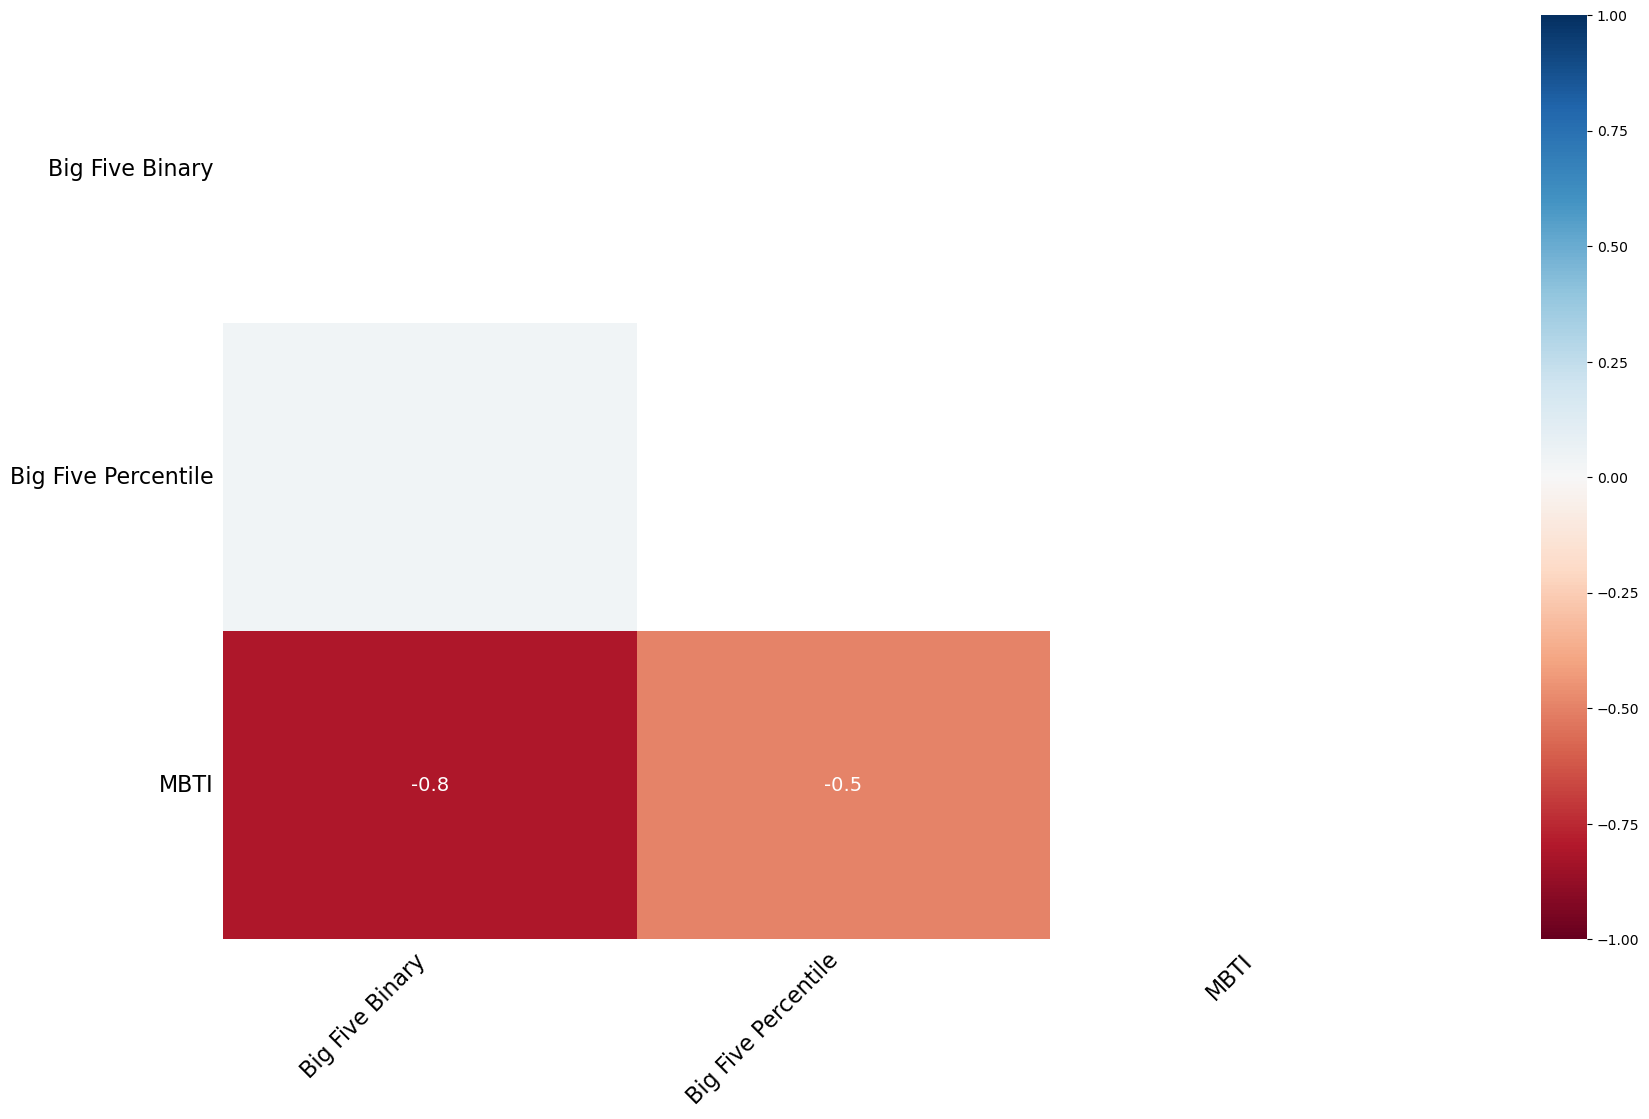

In [7]:
msno.heatmap(corr)
plt.xlabel('')
plt.ylabel('')

<Axes: >

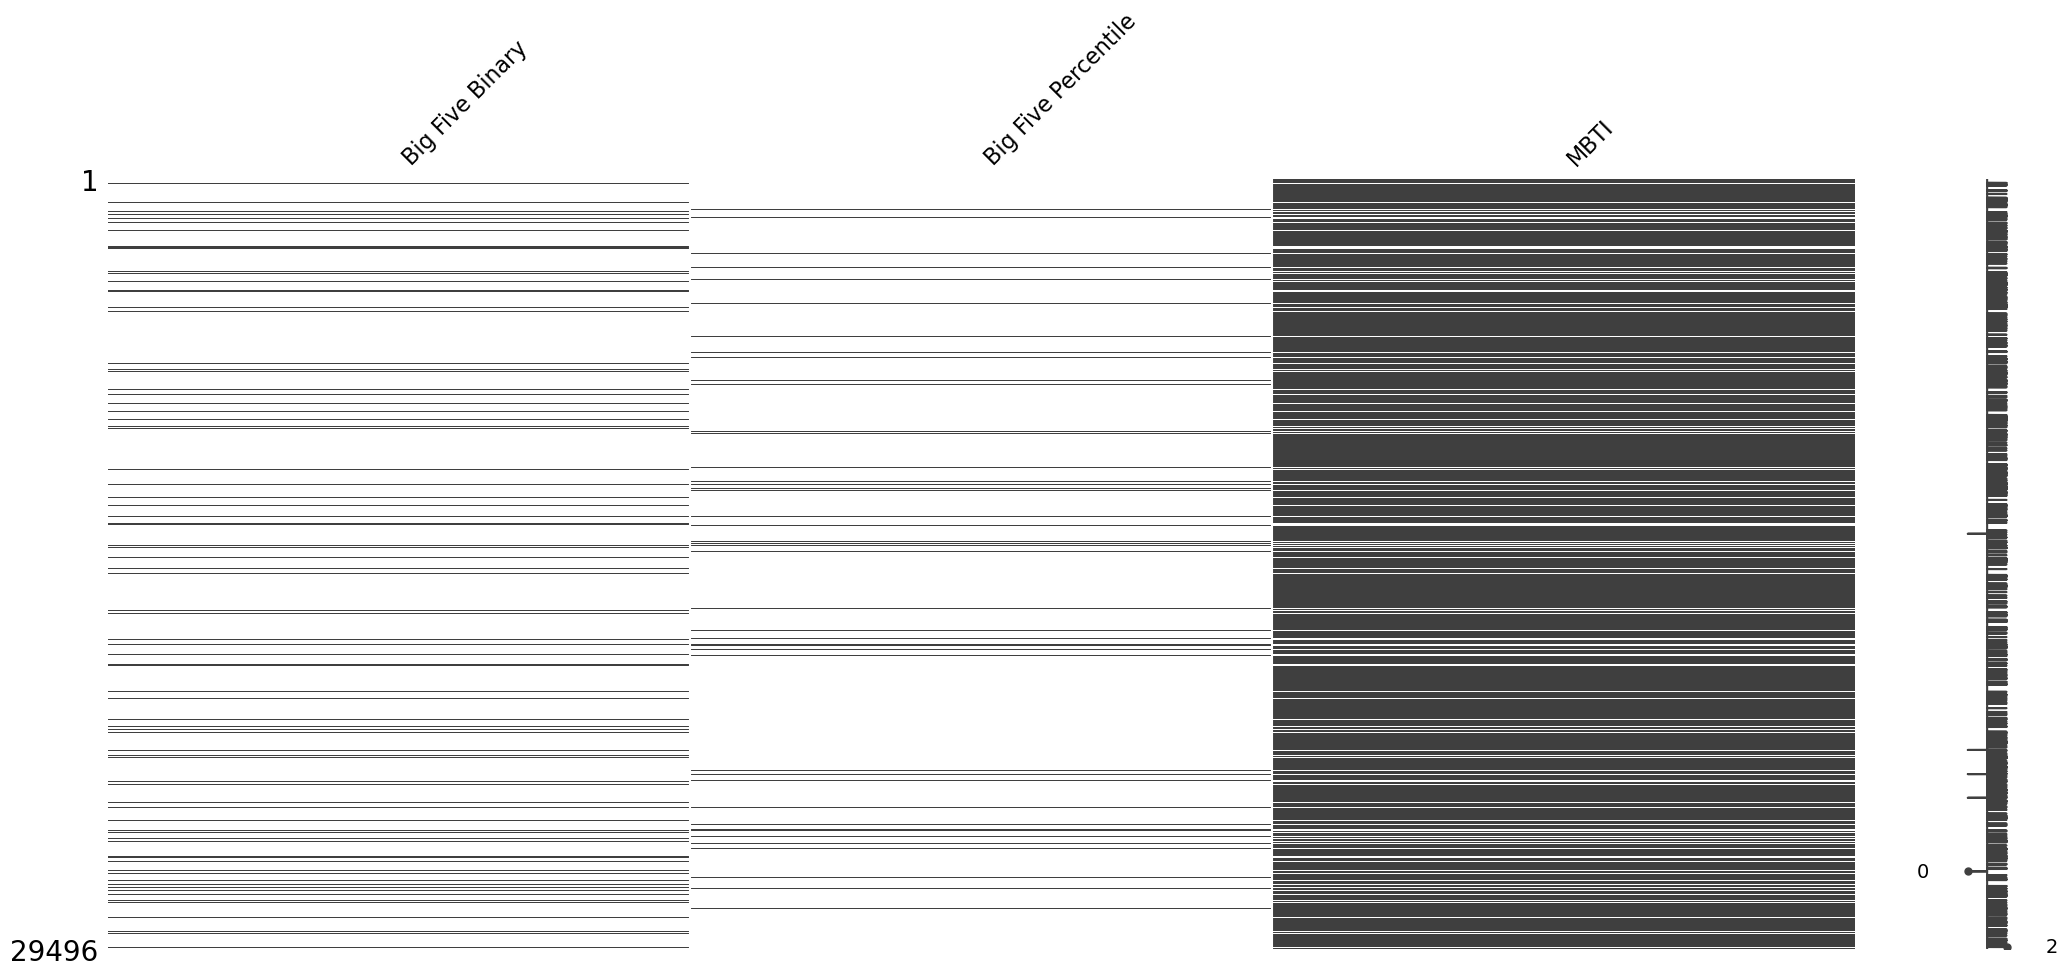

In [8]:

msno.matrix(corr)

In [9]:
mbti_bigfive_s = constants['columns']['mbti'] + constants['columns']['bigfive_s']

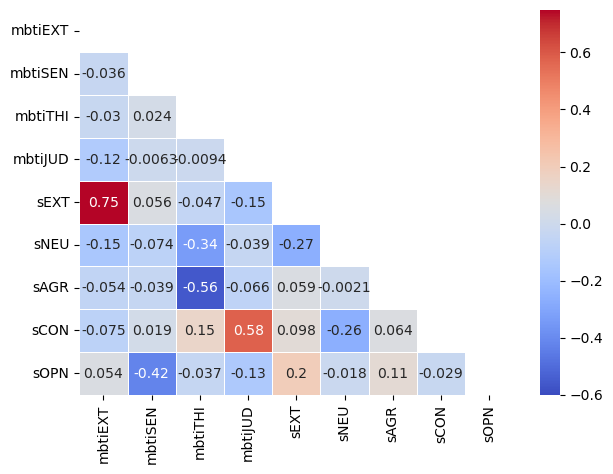

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = df['ORG_TARGET'][mbti_bigfive_s].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.60, vmax=0.75)
plt.xlabel('')
plt.ylabel('')
# plt.title('Correlation between Big Five Percentile and MBTI Type in ORG dataset')
plt.show()


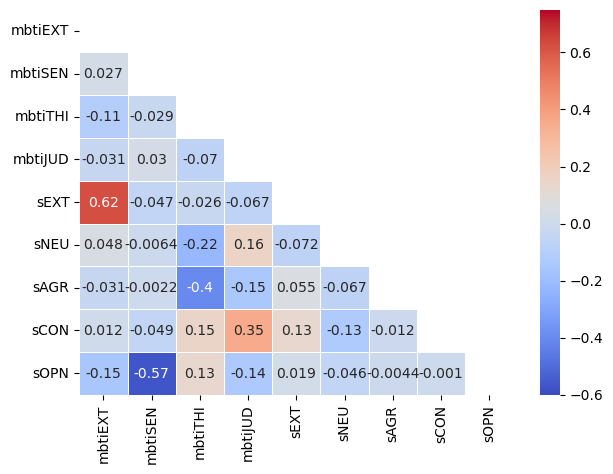

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = df['IMP_TARGET'][mbti_bigfive_s].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.60, vmax=0.75)
plt.xlabel('')
plt.ylabel('')
# plt.title('Correlation between Big Five Percentile and MBTI Type in IMP dataset')
plt.show()


In [12]:
imp_dist = df['IMP_TARGET'].apply(pd.Series.value_counts).T
org_dist = df['ORG_TARGET'].apply(pd.Series.value_counts).T

In [13]:
df.columns

MultiIndex([(     'STATS',              'chars'),
            (     'STATS',         'uppercased'),
            (     'STATS',             'emojis'),
            (     'STATS',              'posts'),
            (     'STATS',         'duplicates'),
            (     'STATS',      'word_nonwords'),
            (     'STATS',      'nonword_words'),
            (     'STATS',     'nonword_spaces'),
            (     'STATS', 'space_punctuations'),
            (     'STATS',           'hashtags'),
            (     'STATS',               'urls'),
            (     'STATS',           'mentions'),
            ('ORG_TARGET',            'mbtiEXT'),
            ('ORG_TARGET',            'mbtiSEN'),
            ('ORG_TARGET',            'mbtiTHI'),
            ('ORG_TARGET',            'mbtiJUD'),
            ('ORG_TARGET',               'cEXT'),
            ('ORG_TARGET',               'cNEU'),
            ('ORG_TARGET',               'cAGR'),
            ('ORG_TARGET',               'cCON'),


In [14]:
mbti_map = {
    'mbtiEXT': 'Extroversion',
    'mbtiSEN': 'Sensing',
    'mbtiTHI': 'Thinking',
    'mbtiJUD': 'Judging'
}

In [15]:
mbti = df.rename(columns=mbti_map)

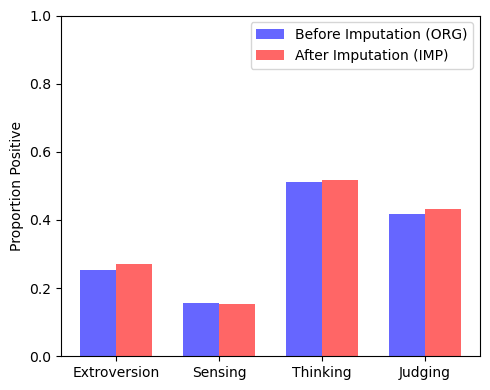

In [16]:
def calculate_proportion(df):
    proportions = {}
    for column in df.columns:
        true_count = df[column].sum()
        total_count = len(df[column])
        proportions[column] = true_count / total_count if total_count != 0 else 0
    return proportions


# Calculate proportions before and after imputation
proportions_before = calculate_proportion(mbti['ORG_TARGET'][mbti_map.values()].dropna(axis=0))
proportions_after = calculate_proportion(mbti['IMP_TARGET'][mbti_map.values()].dropna(axis=0))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Dimension': proportions_before.keys(),
    'Proportion Before': proportions_before.values(),
    'Proportion After': proportions_after.values()
})

# Plotting
plt.figure(figsize=(5, 4))
bar_width = 0.35
index = range(len(plot_data))

# Bar plots
plt.bar(index, plot_data['Proportion Before'], bar_width, label='Before Imputation (ORG)', color='blue', alpha=0.6)
plt.bar([p + bar_width for p in index], plot_data['Proportion After'], bar_width, label='After Imputation (IMP)', color='red', alpha=0.6)

# Labels and title
plt.xlabel('')
plt.ylabel('Proportion Positive')
# plt.title('MBTI Class Balance Before and After Imputation')
plt.xticks([p + bar_width / 2 for p in index], plot_data['Dimension'])
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()



In [17]:
bigfive_c_dict = {
    'cEXT': 'Extraversion',
    'cNEU': 'Neuroticism',
    'cAGR': 'Agreeableness',
    'cCON': 'Conscientiousness',
    'cOPN': 'Openness'
}


In [18]:
bigfive_c = df.rename(columns=bigfive_c_dict)

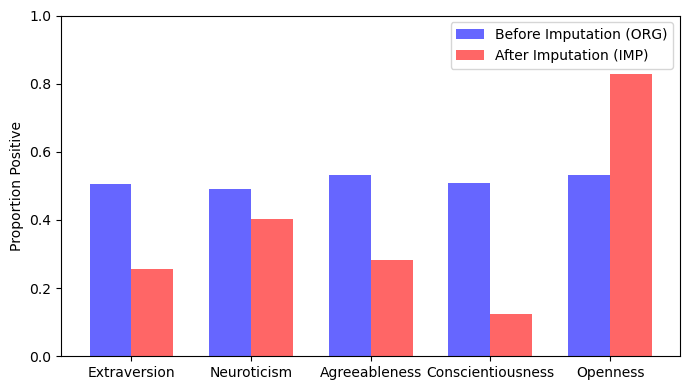

In [19]:
def calculate_proportion(df):
    proportions = {}
    for column in df.columns:
        true_count = df[column].sum()
        total_count = len(df[column])
        proportions[column] = true_count / total_count if total_count != 0 else 0
    return proportions


# Calculate proportions before and after imputation
proportions_before = calculate_proportion(bigfive_c['ORG_TARGET'][bigfive_c_dict.values()].dropna(axis=0))
proportions_after = calculate_proportion(bigfive_c['IMP_TARGET'][bigfive_c_dict.values()].dropna(axis=0))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Dimension': proportions_before.keys(),
    'Proportion Before': proportions_before.values(),
    'Proportion After': proportions_after.values()
})

# Plotting
plt.figure(figsize=(7, 4))
bar_width = 0.35
index = range(len(plot_data))

# Bar plots
plt.bar(index, plot_data['Proportion Before'], bar_width, label='Before Imputation (ORG)', color='blue', alpha=0.6)
plt.bar([p + bar_width for p in index], plot_data['Proportion After'], bar_width, label='After Imputation (IMP)', color='red', alpha=0.6)

# Labels and title
plt.xlabel('')
plt.ylabel('Proportion Positive')
# plt.title('Big Five Class Balance Before and After Imputation')
plt.xticks([p + bar_width / 2 for p in index], plot_data['Dimension'])
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()



In [20]:
bigfive_s_dict = {
    'sEXT': 'Extraversion',
    'sNEU': 'Neuroticism',
    'sAGR': 'Agreeableness',
    'sCON': 'Conscientiousness',
    'sOPN': 'Openness'
}


In [21]:
bigfive_s = df.rename(columns=bigfive_s_dict)

In [22]:
org_bfs = bigfive_s['ORG_TARGET'][bigfive_s_dict.values()].dropna(axis=0)

In [23]:
org_bfs

FEATURE,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
AUTHOR,,,,,
-9209709594471780623,50.0,50.0,30.0,50.0,85.0
-9189368714324501202,37.0,36.0,15.0,66.0,68.0
-9179932949514489112,14.0,17.0,41.0,44.0,43.0
-9178256801304560551,1.0,85.0,57.0,28.0,96.0
-9149934999937013887,22.0,90.0,45.0,13.0,64.0
...,...,...,...,...,...
9153902383019991685,58.0,58.0,89.0,97.0,84.0
9166283747925854102,22.0,19.0,34.0,80.0,26.0
9170849315274659739,54.0,32.6,55.0,37.4,11.6


In [24]:
imp_bfs = bigfive_s['IMP_TARGET'][bigfive_s_dict.values()].dropna(axis=0)

In [25]:
(imp_bfs > 100).any()

FEATURE
Extraversion         True
Neuroticism          True
Agreeableness        True
Conscientiousness    True
Openness             True
dtype: bool

In [26]:
(org_bfs > 99).any()

FEATURE
Extraversion          True
Neuroticism           True
Agreeableness         True
Conscientiousness    False
Openness              True
dtype: bool

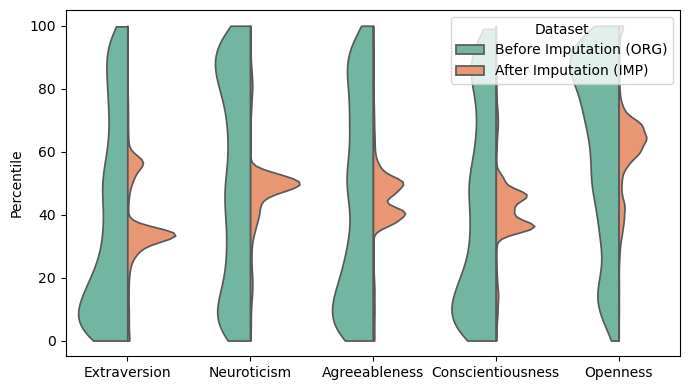

In [27]:
df_before_clipped = bigfive_s['ORG_TARGET'][bigfive_s_dict.values()].clip(lower=0, upper=100).dropna(axis=0)
df_after_clipped = bigfive_s['IMP_TARGET'][bigfive_s_dict.values()].clip(lower=0, upper=100).dropna(axis=0)

# Melt the dataframes for easier plotting
df_before_melted = df_before_clipped.melt(var_name='Dimension', value_name='Percentile')
df_after_melted = df_after_clipped.melt(var_name='Dimension', value_name='Percentile')

# Add a column to indicate before or after imputation
df_before_melted['Dataset'] = 'Before Imputation (ORG)'
df_after_melted['Dataset'] = 'After Imputation (IMP)'

# Reset index to avoid duplicate labels issue
df_before_melted.reset_index(drop=True, inplace=True)
df_after_melted.reset_index(drop=True, inplace=True)

# Combine the dataframes
df_combined = pd.concat([df_before_melted, df_after_melted], ignore_index=True)

# Ensure there are no duplicate labels
assert not df_combined.columns.duplicated().any(), "There are duplicate column labels in the DataFrame."



# Ensure all values are within the expected range
df_combined['Percentile'] = df_combined['Percentile'].clip(lower=0, upper=100)



# Plotting
plt.figure(figsize=(7, 4))
sns.violinplot(x='Dimension', y='Percentile', hue='Dataset', data=df_combined, split=True, inner=None, palette='Set2', cut=0)
# plt.title('Big Five Percentile Class Balance Before and After Imputation')
plt.ylabel('Percentile')
plt.xlabel('')
# plt.ylim(0, 100)  # Ensure y-axis is within 0-100 range

plt.tight_layout()
plt.show()


In [28]:
colu = [(f'{tar}_TARGET', col) for tar in ('ORG', 'IMP') for col in constants['bigfive_s_columns']]

In [29]:
bigfive_s_2 = df[colu].rename(columns=bigfive_s_dict).clip(lower=0, upper=100)
bigfive_s_2

GROUP                  ORG_TARGET                                              \
FEATURE              Extraversion Neuroticism Agreeableness Conscientiousness   
AUTHOR                                                                          
-9223192462986286358          NaN         NaN           NaN               NaN   
-9223027331140286803          NaN         NaN           NaN               NaN   
-9222856035137654294          NaN         NaN           NaN               NaN   
-9222804379051090963          NaN         NaN           NaN               NaN   
-9222547355321442980          NaN         NaN           NaN               NaN   
...                           ...         ...           ...               ...   
 9220025367096517589          NaN         NaN           NaN               NaN   
 9221137650467601654          NaN         NaN           NaN               NaN   
 9221253244137085517          NaN         NaN           NaN               NaN   
 9222615797454098519          NaN         NaN           NaN               NaN   
 9223299406724851482          NaN         NaN           NaN               NaN   

GROUP                           IMP_TARGET                            \
FEATURE              Openness Extraversion Neuroticism Agreeableness   
AUTHOR                                                                 
-9223192462986286358      NaN    28.589103   48.127695     46.932860   
-9223027331140286803      NaN    34.471176   52.027487     49.966158   
-9222856035137654294      NaN    33.768230   51.952698     49.888757   
-9222804379051090963      NaN    35.522894   53.557841     46.562083   
-9222547355321442980      NaN    35.515504   53.300143     46.513683   
...                       ...          ...         ...           ...   
 9220025367096517589      NaN    24.044541   43.362119     37.386599   
 9221137650467601654      NaN    58.438008   51.591116     48.318247   
 9221253244137085517      NaN    57.584461   50.252502     50.512700   
 9222615797454098519      NaN    56.838717   50.107492     51.862421   
 9223299406724851482      NaN    13.718639   35.547043     50.186039   

GROUP                                              
FEATURE              Conscientiousness   Openness  
AUTHOR                                             
-9223192462986286358         43.519149  66.610862  
-9223027331140286803         35.304641  65.322608  
-9222856035137654294         35.265742  65.433603  
-9222804379051090963         45.548068  59.763965  
-9222547355321442980         45.391769  59.394289  
...                                ...        ...  
 9220025367096517589         45.471397  72.041454  
 9221137650467601654         49.971495  51.922559  
 9221253244137085517         40.797084  56.285572  
 9222615797454098519         39.514386  57.570962  
 9223299406724851482         41.365417  74.740118  

[29496 rows x 10 columns]

In [30]:
bigfive_s_2

GROUP                  ORG_TARGET                                              \
FEATURE              Extraversion Neuroticism Agreeableness Conscientiousness   
AUTHOR                                                                          
-9223192462986286358          NaN         NaN           NaN               NaN   
-9223027331140286803          NaN         NaN           NaN               NaN   
-9222856035137654294          NaN         NaN           NaN               NaN   
-9222804379051090963          NaN         NaN           NaN               NaN   
-9222547355321442980          NaN         NaN           NaN               NaN   
...                           ...         ...           ...               ...   
 9220025367096517589          NaN         NaN           NaN               NaN   
 9221137650467601654          NaN         NaN           NaN               NaN   
 9221253244137085517          NaN         NaN           NaN               NaN   
 9222615797454098519          NaN         NaN           NaN               NaN   
 9223299406724851482          NaN         NaN           NaN               NaN   

GROUP                           IMP_TARGET                            \
FEATURE              Openness Extraversion Neuroticism Agreeableness   
AUTHOR                                                                 
-9223192462986286358      NaN    28.589103   48.127695     46.932860   
-9223027331140286803      NaN    34.471176   52.027487     49.966158   
-9222856035137654294      NaN    33.768230   51.952698     49.888757   
-9222804379051090963      NaN    35.522894   53.557841     46.562083   
-9222547355321442980      NaN    35.515504   53.300143     46.513683   
...                       ...          ...         ...           ...   
 9220025367096517589      NaN    24.044541   43.362119     37.386599   
 9221137650467601654      NaN    58.438008   51.591116     48.318247   
 9221253244137085517      NaN    57.584461   50.252502     50.512700   
 9222615797454098519      NaN    56.838717   50.107492     51.862421   
 9223299406724851482      NaN    13.718639   35.547043     50.186039   

GROUP                                              
FEATURE              Conscientiousness   Openness  
AUTHOR                                             
-9223192462986286358         43.519149  66.610862  
-9223027331140286803         35.304641  65.322608  
-9222856035137654294         35.265742  65.433603  
-9222804379051090963         45.548068  59.763965  
-9222547355321442980         45.391769  59.394289  
...                                ...        ...  
 9220025367096517589         45.471397  72.041454  
 9221137650467601654         49.971495  51.922559  
 9221253244137085517         40.797084  56.285572  
 9222615797454098519         39.514386  57.570962  
 9223299406724851482         41.365417  74.740118  

[29496 rows x 10 columns]

In [31]:
ext = bigfive_s_2[[('ORG_TARGET', 'Extraversion'), ('IMP_TARGET', 'Extraversion')]]

# Melt the dataframes for easier plotting
ext = ext.melt(var_name='Dimension', value_name='Score')
ext

,Dimension,Score
0,ORG_TARGET,NaN
1,ORG_TARGET,NaN
2,ORG_TARGET,NaN
3,ORG_TARGET,NaN
4,ORG_TARGET,NaN
...,...,...
58987,IMP_TARGET,24.044541
58988,IMP_TARGET,58.438008
58989,IMP_TARGET,57.584461
58990,IMP_TARGET,56.838717
